In [ ]:
#!nvidia-smi

In [ ]:
# For this project, we will be using the Fruits 360 dataset from Kaggle.
# We shall use Kaggle API to get the dataset from Kaggle

In [ ]:
!pip install opendatasets

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/moltean/fruits/fruits-360_dataset/fruits-360")

Skipping, found downloaded files in "./fruits" (use force=True to force download)


In [ ]:
!unzip -q "/content/FruitsData.zip"

unzip:  cannot find or open /content/FruitsData.zip, /content/FruitsData.zip.zip or /content/FruitsData.zip.ZIP.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50V2

tf.random.set_seed(4)

In [ ]:
train_path = Path("fruits/fruits-360_dataset/fruits-360/Training")
test_path = Path("fruits/fruits-360_dataset/fruits-360/Test")

In [ ]:
train_image_paths = list(train_path.glob("*/*"))
train_image_paths = list(map(lambda x:str(x), train_image_paths))
train_image_paths[:10]

['fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_247_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/288_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/305_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/0_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/317_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_317_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_253_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_204_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_94_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_201_100.jpg']

In [ ]:
train_image_paths = list(train_path.glob("*/*"))
train_image_paths = list(map(lambda x:str(x), train_image_paths))
train_image_paths[:10]

['fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_247_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/288_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/305_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/0_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/317_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_317_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_253_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_204_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_94_100.jpg',
 'fruits/fruits-360_dataset/fruits-360/Training/Pomegranate/r_201_100.jpg']

In [ ]:
def get_label(image_path):
  return image_path.split("/")[-2]

train_image_labels = list(map(lambda x: get_label(x), train_image_paths))

train_image_labels[100:110]

['Pomegranate',
 'Pomegranate',
 'Pomegranate',
 'Pomegranate',
 'Pomegranate',
 'Pomegranate',
 'Pomegranate',
 'Pomegranate',
 'Pomegranate',
 'Pomegranate']

In [ ]:
Le = LabelEncoder()
train_image_labels = Le.fit_transform(train_image_labels)
train_image_labels[:10]

array([105, 105, 105, 105, 105, 105, 105, 105, 105, 105])

In [ ]:
train_image_labels = tf.keras.utils.to_categorical(train_image_labels)
train_image_labels[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
Train_paths, Val_paths, Train_labels, Val_labels = train_test_split(train_image_paths,train_image_labels)

In [ ]:
Train_paths[:10], Train_labels[:10]

(['fruits/fruits-360_dataset/fruits-360/Training/Grape White 3/r_254_100.jpg',
  'fruits/fruits-360_dataset/fruits-360/Training/Pepper Yellow/r_270_100.jpg',
  'fruits/fruits-360_dataset/fruits-360/Training/Onion Red Peeled/r_26_100.jpg',
  'fruits/fruits-360_dataset/fruits-360/Training/Grape Blue/31_100.jpg',
  'fruits/fruits-360_dataset/fruits-360/Training/Pitahaya Red/14_100.jpg',
  'fruits/fruits-360_dataset/fruits-360/Training/Apple Red 3/r_276_100.jpg',
  'fruits/fruits-360_dataset/fruits-360/Training/Banana Lady Finger/r2_29_100.jpg',
  'fruits/fruits-360_dataset/fruits-360/Training/Cantaloupe 2/r_137_100.jpg',
  'fruits/fruits-360_dataset/fruits-360/Training/Pear Stone/200_100.jpg',
  'fruits/fruits-360_dataset/fruits-360/Training/Apple Golden 1/222_100.jpg'],
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 

In [ ]:
# Data Augmentation

In [ ]:
#Function to read image jpeg file and return Image tensor and label for the same

In [ ]:
def load(image, label):
  image = tf.io.read_file(image)
  image = tf.io.decode_jpeg(image, channels = 3)
  return image, label

In [ ]:
# Define Augmentation

In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 32

# Basic Transformation for Resize
resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)                                                            
])

#Data Augmentation
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal")                                         ,
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=(-0.3, -0.2))
])

2022-03-27 11:59:32.844472: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-27 11:59:32.888768: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-27 11:59:32.889226: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-27 11:59:32.891425: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-27 11:59:32.891825: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read f

In [ ]:
# Load and Convert Image files to Tensors

AUTOTUNE = tf.data.experimental.AUTOTUNE

def get_dataset(paths, labels, train=True):
  #Convert Paths and Labels to TF tensors
  image_paths = tf.convert_to_tensor(paths)
  labels = tf.convert_to_tensor(labels)

  #Create dataset object for images and labels
  image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
  label_dataset = tf.data.Dataset.from_tensor_slices(labels)

  # Zip the images and labels
  dataset = tf.data.Dataset.zip((image_dataset, label_dataset))
  

  #Apply load function to all the images and labels
  dataset = dataset.map(lambda image, label: load(image, label))
  dataset = dataset.map(lambda image, label: (resize(image), label), num_parallel_calls = AUTOTUNE)
  dataset = dataset.shuffle(1000)
  dataset = dataset.batch(BATCH_SIZE)

  #For Training dataset, apply Augmentation, for Validation, only Repeat

  if train:
    dataset = dataset.map(lambda image, label: (data_augmentation(image), label), num_parallel_calls = AUTOTUNE)
  
  dataset = dataset.repeat()

  return dataset


In [ ]:
#Create Training dataset and Validate the same

%time train_dataset = get_dataset(Train_paths , Train_labels)

image, label = next(iter(train_dataset))
print(image.shape)
print(label.shape)


CPU times: user 482 ms, sys: 34.4 ms, total: 516 ms
Wall time: 519 ms
(32, 224, 224, 3)
(32, 131)


Potato Red


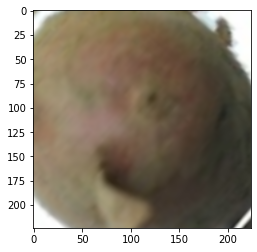

In [ ]:
plt.imshow((image[0].numpy()/255).reshape(224,224,3))
print(Le.inverse_transform(np.argmax(label, axis=1))[0])

CPU times: user 61.8 ms, sys: 1.91 ms, total: 63.7 ms
Wall time: 62 ms
(32, 224, 224, 3)
(32, 131)
Salak


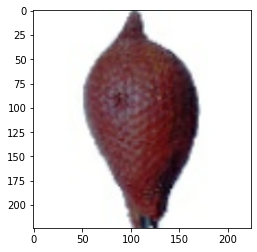

In [ ]:
#Create Training dataset and Validate the same

%time val_dataset = get_dataset(Train_paths , Train_labels, train=False)

image, label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

plt.imshow((image[0].numpy()/255).reshape(224,224,3))
print(Le.inverse_transform(np.argmax(label, axis=1))[0])

In [ ]:
backbone = ResNet50V2(
    input_shape=(224,224,3),
    include_top = False
)

Model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(131, activation = 'softmax')

])

Model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 131)               268419    
                                                                 
Total params: 23,833,219
Trainable params: 23,787,779
Non-trainable params: 45,440
_________________________________________________________________


In [ ]:
#Compile the Model
Model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001,beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-07),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', tf.keras.metrics.Precision(name = 'precision'), tf.keras.metrics.Recall(name = 'Recall')]
)

In [ ]:
#Train the Model

history = Model.fit(
    train_dataset,
    steps_per_epoch = len(Train_paths)//BATCH_SIZE,
    epochs = 1,
    validation_data = val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE
)

2022-03-27 11:59:44.771190: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


1586/1586 [==============================] - 912s 566ms/step - loss: 0.4473 - accuracy: 0.8732 - precision: 0.9311 - Recall: 0.8392 - val_loss: 3.2743 - val_accuracy: 0.4877 - val_precision: 0.5265 - val_Recall: 0.4627


In [ ]:
#Turn off the backbone network(ResNet)
Model.layers[0].trainable = False

In [ ]:
#Define Callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint("ResNet Best Weights.h5", verbose = 1, save_best_only = True, save_weights_only = True)
early_stop = tf.keras.callbacks.EarlyStopping(patience=4)

In [ ]:
Model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 131)               268419    
                                                                 
Total params: 23,833,219
Trainable params: 268,419
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
#Train the Model without the backbone layer

#Train the Model

history = Model.fit(
    train_dataset,
    steps_per_epoch = len(Train_paths)//BATCH_SIZE,
    epochs = 8,
    callbacks = [checkpoint, early_stop],
    validation_data = val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE
)

Epoch 1/8
1586/1586 [==============================] - ETA: 0s - loss: 0.0836 - accuracy: 0.9741 - precision: 0.9766 - Recall: 0.9713
Epoch 00001: val_loss improved from inf to 1.60026, saving model to ResNet Best Weights.h5
1586/1586 [==============================] - 896s 565ms/step - loss: 0.0836 - accuracy: 0.9741 - precision: 0.9766 - Recall: 0.9713 - val_loss: 1.6003 - val_accuracy: 0.6258 - val_precision: 0.6635 - val_Recall: 0.5993
Epoch 2/8
1586/1586 [==============================] - ETA: 0s - loss: 0.0562 - accuracy: 0.9823 - precision: 0.9838 - Recall: 0.9805
Epoch 00002: val_loss did not improve from 1.60026
1586/1586 [==============================] - 899s 565ms/step - loss: 0.0562 - accuracy: 0.9823 - precision: 0.9838 - Recall: 0.9805 - val_loss: 4.0936 - val_accuracy: 0.5218 - val_precision: 0.5410 - val_Recall: 0.5085
Epoch 3/8
1586/1586 [==============================] - ETA: 0s - loss: 0.0456 - accuracy: 0.9863 - precision: 0.9875 - Recall: 0.9853
Epoch 00003: val_l